# Name: Sreemanth
# Registration Number: 18BCE0745
# Set-C

## Question:
# Consider the network graph dataset given in the attached file network.txt
##  a) Using networkx , print the graph as undirected and directed using the dataset. 
##  b) Calculate the Betweenness centrality and Proximity prestige for each node. 
##  c) Print them in descending order along with their corresponding values. 
##  d) Print the maximum, minimum and average degree of the network. 

# Dataset

In [93]:
f = open("network.txt", "r")
print(f.read())

3 1
10 1
1 2
3 2
5 2
6 2
8 2
9 2
10 2
1 3
9 3
10 3
2 4
3 4
5 4
6 4
7 4
8 4
11 4
3 5
6 5
10 5
1 6
2 6
3 6
5 6
11 6
3 7
4 7
5 7
6 7
8 7
9 7
2 8
3 8
4 8
5 8
6 8
7 8
9 8
11 8
7 9
1 10
3 10
5 10
7 11
8 11
9 11



# 1a) Using networkx , print the graph as undirected and directed using the dataset. 

# Undirected Graph

In [94]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [95]:
g = nx.Graph()
edges = nx.read_edgelist('network.txt')

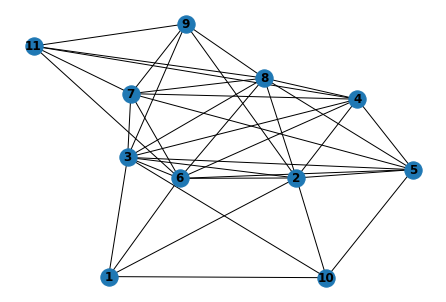

In [96]:
g.add_edges_from(edges.edges())
nx.draw(g, with_labels=True, font_weight='bold')
plt.savefig("hello.png")


# Directed Graph

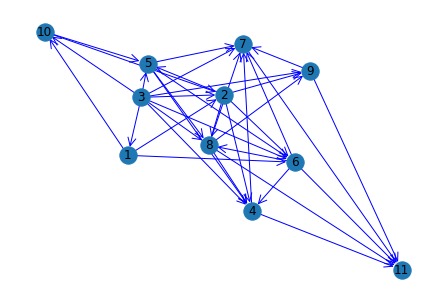

In [97]:
g1 = nx.DiGraph()
edges = nx.read_edgelist('network.txt')
g1.add_edges_from(edges.edges())
nx.draw(g1, with_labels = True, edge_color = 'b', arrowsize=20, arrowstyle='->')

# 1b) Calculate the Betweenness centrality and Proximity prestige for each node. 

# Pseudo Code
#### 1) Finding Shortest distance from all the nodes and dividing with main node to get proximity prestige
#### 2) Using inbuilt function to get Betweenness Centrality

# Proximity Prestige

In [98]:
x=list(g.nodes)
distance=[]
distdic = {}
for i in range(0,11) :
    temp_dis = 0
    n = 0
    for j in range(0,11):
        if(nx.has_path(g,x[i],x[j]) == True):
            temp_dis = temp_dis + nx.shortest_path_length(g,source = x[j],target = x[i])
            n = n + 1
    if temp_dis == 0:
        distance.append([x[i], 0])
    else:
        distance.append([x[i], temp_dis/(n - 1)])

print("\nPROXIMITY PRESTIGE :\n")
for i in distance:
    print(str(i[0]) + " : " + str(i[1]))
    distdic[i[0]]=i[1]



PROXIMITY PRESTIGE :

3 : 1.1
1 : 1.6
2 : 1.2
9 : 1.5
10 : 1.7
4 : 1.3
5 : 1.3
6 : 1.2
7 : 1.3
8 : 1.2
11 : 1.6


# Betweenness Centrality

In [99]:
print("\nBetweenness Centrality PRESTIGE :\n")
bcen = nx.betweenness_centrality(g, k=None, normalized=True, weight=None, endpoints=False,seed=None)
bcen



Betweenness Centrality PRESTIGE :



{'3': 0.11126984126984127,
 '1': 0.007142857142857143,
 '2': 0.08375661375661377,
 '9': 0.016878306878306878,
 '10': 0.005555555555555556,
 '4': 0.024021164021164026,
 '5': 0.041534391534391535,
 '6': 0.0793121693121693,
 '7': 0.02761904761904762,
 '8': 0.03846560846560847,
 '11': 0.008888888888888889}

# 1c) Print them in descending order along with their corresponding values

# Pseudo Code
#### 1) Use sorted() to promity distance and overwrite the orginal dict to place in descending order
#### 2) Use sorted() to betweenness centrality and overwrite the orginal dict to place in descending order


# Proximity Prestige

In [100]:
print("\nProximity Prestige in Descending Order: \n")
{k: v for k, v in sorted(distdic.items(), key=lambda item: item[1],reverse=True)}


Proximity Prestige in Descending Order: 



{'10': 1.7,
 '1': 1.6,
 '11': 1.6,
 '9': 1.5,
 '4': 1.3,
 '5': 1.3,
 '7': 1.3,
 '2': 1.2,
 '6': 1.2,
 '8': 1.2,
 '3': 1.1}

# Betweenness Centrality

In [101]:
print("\nBetweenness Centrality in Descending Order: \n")
{k: v for k, v in sorted(bcen.items(), key=lambda item: item[1],reverse=True)}


Betweenness Centrality in Descending Order: 



{'3': 0.11126984126984127,
 '2': 0.08375661375661377,
 '6': 0.0793121693121693,
 '5': 0.041534391534391535,
 '8': 0.03846560846560847,
 '7': 0.02761904761904762,
 '4': 0.024021164021164026,
 '9': 0.016878306878306878,
 '11': 0.008888888888888889,
 '1': 0.007142857142857143,
 '10': 0.005555555555555556}

# 1d) Print the maximum, minimum and average degree of the network. 

## Pseudo Code
#### 1) Get the degrees
#### 2) Store them in dictionary
#### 3) Use inbuilt min and max to get corresponding degree value
#### 4) find average

In [102]:
#Getting the degree Values
des=dict(g.degree())
des

{'3': 9,
 '1': 4,
 '2': 8,
 '9': 5,
 '10': 4,
 '4': 7,
 '5': 7,
 '6': 8,
 '7': 7,
 '8': 8,
 '11': 5}

# Maximum degree

In [103]:
Keymax = max(des, key=des.get) 
print("Node "+str(Keymax)+" is Maximum degree node with value of "+ str(des[Keymax]))

Node 3 is Maximum degree node with value of 9


# Minimum degree

In [104]:
Keymin = min(des, key=des.get) 
print("Node "+str(Keymin)+" is Minimum degree node with value of "+ str(des[Keymin]))

Node 1 is Minimum degree node with value of 4


# Average degree

In [89]:
filtered_vals = [v for _, v in des.items() if v != 0]
average = sum(filtered_vals) / len(filtered_vals)
# print(average)
print("Average Degree Value is "+ str(average))

Average Degree Value is 6.545454545454546
